### Task 1: Data Understanding & Preprocessing

In [28]:
# Imported Required Libraries
import pandas as pd
import numpy as np

In [29]:
# Load the dataset
df = pd.read_excel("practice.xlsx")

##### The dataset is loaded using pandas, which is the standard library for time series data manipulation in Python.

**Initial Data Inspection**

In [30]:
df.head(5) # shows first 5 rows of dataset

,Date,Open,High,Low,Close,Volume,Change_Price,lowest_low,highest_high,%K,...,ADL,Chaikin_Oscillator,Typical_Price,Raw_Money_Flow,Money_Flow_Ratio,MFI,Short_MA,Long_MA,,
0,2013-01-02,16798.55,16809.86,16379.47,16489.99,154585920,-304.88,NaN,NaN,NaN,...,-1.503871e+08,0.000000e+00,16559.773333,2.559908e+12,NaN,NaN,NaN,NaN,,
1,2013-01-03,16495.49,16602.64,16451.68,16588.54,62003520,98.55,NaN,NaN,NaN,...,1.008420e+08,7.993654e+07,16547.620000,1.026011e+12,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-04,16594.90,16701.36,16588.27,16648.84,56652288,60.30,NaN,NaN,NaN,...,8.065274e+06,7.585103e+07,16646.156667,9.430429e+11,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-07,16651.19,16648.84,16424.90,16502.65,58461800,-146.19,NaN,NaN,NaN,...,-3.573391e+07,5.334804e+07,16525.463333,9.661083e+11,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-08,16513.84,16655.13,16502.65,16645.76,48166248,143.11,NaN,NaN,NaN,...,8.449310e+07,7.754649e+07,16601.180000,7.996166e+11,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.tail(5) # displays last 5 rows of dataset

,Date,Open,High,Low,Close,Volume,Change_Price,lowest_low,highest_high,%K,...,ADL,Chaikin_Oscillator,Typical_Price,Raw_Money_Flow,Money_Flow_Ratio,MFI,Short_MA,Long_MA,,
435,2019-09-16,31825.85,31954.56,31481.31,31928.55,81649640,447.24,29400.28,35892.29,38.944333,...,1.453493e+08,2.119350e+07,31788.140000,2.595490e+12,9.631891,90.594336,37398.6372,39709.30610,NaN,NaN
436,2019-09-18,31887.42,31908.92,31508.75,31555.47,74587200,-353.45,29400.28,35186.09,37.249581,...,-1.143421e+08,-4.606242e+07,31657.713333,2.361260e+12,10.915235,91.607383,37098.1342,39697.62805,NaN,NaN
437,2019-09-25,31804.79,31867.79,31472.02,31565.21,65928448,-264.03,29400.28,35061.54,38.241134,...,-6.976152e+07,-5.520399e+07,31635.006667,2.085647e+12,12.634390,92.665605,36896.9680,39690.73170,NaN,NaN
438,2019-09-26,31588.52,31592.11,31272.06,31433.89,88576040,-131.32,29400.28,33957.79,44.621076,...,1.998185e+06,-3.109255e+07,31432.686667,2.784183e+12,11.111829,91.743609,36690.9648,39678.74935,NaN,NaN
439,2019-09-27,31528.13,32085.73,31368.81,32070.81,107183280,636.92,29400.28,33957.79,58.596251,...,2.054441e+08,4.633061e+07,31841.783333,3.412907e+12,6.773342,87.135521,36507.9460,39672.17975,NaN,NaN


In [32]:
df.columns # display all coloumns list

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change_Price',
       'lowest_low', 'highest_high', '%K', '%D', 'ROC', '%R', 'Momentum',
       'Disparity_5', 'Disparity_14', 'MA5', 'MA10', 'OSCP', 'CCI', 'RSI',
       'PP', 'S1', 'S2', 'R1', 'R2', 'EMA', 'WMA', 'SMA', 'STD', 'Upper_Band',
       'Lower_Band', 'Short_EMA', 'Long_EMA', 'MACD', 'Signal_Line', 'TR',
       'ATR', 'OBV', 'ADL', 'Chaikin_Oscillator', 'Typical_Price',
       'Raw_Money_Flow', 'Money_Flow_Ratio', 'MFI', 'Short_MA', 'Long_MA',
       '     ', '       '],
      dtype='object')

In [33]:
df.drop(labels = ['     ', '       '], axis = 1, inplace = True) # drops unncessary coloumns and modifies original data

In [34]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change_Price',
       'lowest_low', 'highest_high', '%K', '%D', 'ROC', '%R', 'Momentum',
       'Disparity_5', 'Disparity_14', 'MA5', 'MA10', 'OSCP', 'CCI', 'RSI',
       'PP', 'S1', 'S2', 'R1', 'R2', 'EMA', 'WMA', 'SMA', 'STD', 'Upper_Band',
       'Lower_Band', 'Short_EMA', 'Long_EMA', 'MACD', 'Signal_Line', 'TR',
       'ATR', 'OBV', 'ADL', 'Chaikin_Oscillator', 'Typical_Price',
       'Raw_Money_Flow', 'Money_Flow_Ratio', 'MFI', 'Short_MA', 'Long_MA'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                440 non-null    datetime64[ns]
 1   Open                440 non-null    float64       
 2   High                440 non-null    float64       
 3   Low                 440 non-null    float64       
 4   Close               440 non-null    float64       
 5   Volume              440 non-null    int64         
 6   Change_Price        440 non-null    float64       
 7   lowest_low          427 non-null    float64       
 8   highest_high        427 non-null    float64       
 9   %K                  427 non-null    float64       
 10  %D                  425 non-null    float64       
 11  ROC                 428 non-null    float64       
 12  %R                  427 non-null    float64       
 13  Momentum            436 non-null    float64       

In [36]:
df.describe()

,Date,Open,High,Low,Close,Volume,Change_Price,lowest_low,highest_high,%K,...,ATR,OBV,ADL,Chaikin_Oscillator,Typical_Price,Raw_Money_Flow,Money_Flow_Ratio,MFI,Short_MA,Long_MA
count,440,440.000000,440.000000,440.000000,440.000000,4.400000e+02,440.000000,427.000000,427.000000,427.000000,...,427.000000,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,426.000000,426.000000,391.000000,241.000000
mean,2015-08-31 23:56:43.636363520,32368.614432,32557.558705,32172.765932,32371.196932,1.277153e+08,32.719705,30778.149157,34368.332670,63.858798,...,385.091151,9.786888e+09,1.040213e+07,1.459515e+06,32367.173856,4.079130e+12,16.805439,93.299746,33193.499514,33382.100974
min,2013-01-02 00:00:00,16108.240000,16225.070000,16036.040000,16107.890000,1.126921e+07,-1328.060000,16036.040000,16908.800000,0.595643,...,110.718571,-1.545859e+08,-5.097462e+08,-2.034990e+08,16147.526667,3.234578e+11,3.765373,79.015286,17701.250000,24758.162150
25%,2014-01-21 12:00:00,26227.320000,26354.342500,26067.065000,26232.652500,8.391885e+07,-118.975000,25384.930000,27213.210000,35.442893,...,292.452143,6.867567e+09,-1.177647e+08,-4.310575e+07,26223.446667,2.569440e+12,11.024799,91.683794,27269.731800,29377.443950
50%,2015-06-11 12:00:00,32647.445000,32751.620000,32431.380000,32575.570000,1.154434e+08,29.215000,31011.150000,34306.750000,76.418434,...,353.176429,1.060199e+10,3.074040e+05,1.879557e+06,32623.236667,3.527276e+12,14.710960,93.634947,33303.708200,32993.201750
75%,2016-12-20 12:00:00,39188.992500,39295.180000,38880.440000,39092.407500,1.654420e+08,183.947500,36483.200000,41289.025000,94.232536,...,494.030714,1.478030e+10,1.380620e+08,4.446742e+07,39085.940833,5.098919e+12,20.413671,95.330067,39210.093400,38514.573450
max,2019-09-27 00:00:00,53042.150000,53127.240000,52733.890000,52869.010000,3.649492e+08,1565.630000,48555.300000,53127.240000,99.743778,...,835.205714,1.609926e+10,5.090901e+08,2.260187e+08,52910.046667,1.389569e+13,158.610547,99.373475,48497.969200,39900.370200
std,NaN,9022.311019,9071.849834,8961.893959,9025.197216,5.813960e+07,299.460243,8276.575587,9528.640147,33.438960,...,144.789638,4.641333e+09,1.720680e+08,6.134163e+07,9018.937619,2.141643e+12,10.185776,2.648983,8339.070307,4853.083715


Initial inspection helps understand available columns, data types, presence of missing values, and basic statistical properties.

In [37]:
df # display the full data frame

,Date,Open,High,Low,Close,Volume,Change_Price,lowest_low,highest_high,%K,...,ATR,OBV,ADL,Chaikin_Oscillator,Typical_Price,Raw_Money_Flow,Money_Flow_Ratio,MFI,Short_MA,Long_MA
0,2013-01-02,16798.55,16809.86,16379.47,16489.99,154585920,-304.88,NaN,NaN,NaN,...,NaN,-154585920,-1.503871e+08,0.000000e+00,16559.773333,2.559908e+12,NaN,NaN,NaN,NaN
1,2013-01-03,16495.49,16602.64,16451.68,16588.54,62003520,98.55,NaN,NaN,NaN,...,NaN,-92582400,1.008420e+08,7.993654e+07,16547.620000,1.026011e+12,NaN,NaN,NaN,NaN
2,2013-01-04,16594.90,16701.36,16588.27,16648.84,56652288,60.30,NaN,NaN,NaN,...,NaN,-35930112,8.065274e+06,7.585103e+07,16646.156667,9.430429e+11,NaN,NaN,NaN,NaN
3,2013-01-07,16651.19,16648.84,16424.90,16502.65,58461800,-146.19,NaN,NaN,NaN,...,NaN,-94391912,-3.573391e+07,5.334804e+07,16525.463333,9.661083e+11,NaN,NaN,NaN,NaN
4,2013-01-08,16513.84,16655.13,16502.65,16645.76,48166248,143.11,NaN,NaN,NaN,...,NaN,-46225664,8.449310e+07,7.754649e+07,16601.180000,7.996166e+11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2019-09-16,31825.85,31954.56,31481.31,31928.55,81649640,447.24,29400.28,35892.29,38.944333,...,511.027143,14845745432,1.453493e+08,2.119350e+07,31788.140000,2.595490e+12,9.631891,90.594336,37398.6372,39709.30610
436,2019-09-18,31887.42,31908.92,31508.75,31555.47,74587200,-353.45,29400.28,35186.09,37.249581,...,519.476429,14771158232,-1.143421e+08,-4.606242e+07,31657.713333,2.361260e+12,10.915235,91.607383,37098.1342,39697.62805
437,2019-09-25,31804.79,31867.79,31472.02,31565.21,65928448,-264.03,29400.28,35061.54,38.241134,...,506.497143,14837086680,-6.976152e+07,-5.520399e+07,31635.006667,2.085647e+12,12.634390,92.665605,36896.9680,39690.73170
438,2019-09-26,31588.52,31592.11,31272.06,31433.89,88576040,-131.32,29400.28,33957.79,44.621076,...,499.673571,14748510640,1.998185e+06,-3.109255e+07,31432.686667,2.784183e+12,11.111829,91.743609,36690.9648,39678.74935


In [38]:
df.dtypes # display types of data (int, float)

Date                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                         int64
Change_Price                 float64
lowest_low                   float64
highest_high                 float64
%K                           float64
%D                           float64
ROC                          float64
%R                           float64
Momentum                     float64
Disparity_5                  float64
Disparity_14                 float64
MA5                          float64
MA10                         float64
OSCP                         float64
CCI                          float64
RSI                          float64
PP                           float64
S1                           float64
S2                           float64
R1                           float64
R2                           float64
EMA                          float64
W

#### Step - 1: Time Variable

In [41]:
df['Date'] # displays the data of column

0     2013-01-02
1     2013-01-03
2     2013-01-04
3     2013-01-07
4     2013-01-08
         ...    
435   2019-09-16
436   2019-09-18
437   2019-09-25
438   2019-09-26
439   2019-09-27
Name: Date, Length: 440, dtype: datetime64[ns]

In [42]:
df['Date'] = pd.to_datetime(df['Date']) # Converts the "Date" column into proper datetime format

In [44]:
df.set_index('Date', inplace=True) # Set Date as index

##### The Date column is the time variable of the dataset. Converting it to datetime and setting it as the index is essential because: time series operations (resampling, rolling statistics, forecasting) require a datetime index, it preserves temporal order of observations.

#### Two preprocessing steps: Handle Missing Values

In [45]:
df.isna() # detects missing values with true/false

,Open,High,Low,Close,Volume,Change_Price,lowest_low,highest_high,%K,%D,...,ATR,OBV,ADL,Chaikin_Oscillator,Typical_Price,Raw_Money_Flow,Money_Flow_Ratio,MFI,Short_MA,Long_MA
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
2013-01-03,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
2013-01-04,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
2013-01-07,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
2013-01-08,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-16,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-09-18,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-09-25,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
df.isnull().sum()

Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
Change_Price            0
lowest_low             13
highest_high           13
%K                     13
%D                     15
ROC                    12
%R                     13
Momentum                4
Disparity_5             4
Disparity_14           13
MA5                     4
MA10                    9
OSCP                    9
CCI                    19
RSI                    13
PP                      0
S1                      0
S2                      0
R1                      0
R2                      0
EMA                     0
WMA                    19
SMA                    19
STD                    19
Upper_Band             19
Lower_Band             19
Short_EMA               0
Long_EMA                0
MACD                    0
Signal_Line             0
TR                      0
ATR                    13
OBV                     0
ADL         

In [47]:
# Forward fill missing values
df.fillna(method='ffill', inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_14240\1910429549.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


##### Forward filling is used because:

financial time series often rely on the most recent available information,
it preserves temporal continuity,
and avoids data leakage from future observations.

#### 2: Remove Duplicate Records

In [48]:
# Check duplicate rows
df.duplicated().sum()

np.int64(0)

##### Removing duplicates ensures that each time point represents a unique observation.

### Resampling the Time Series

In [49]:
# Resample data to monthly frequency using mean
df_monthly = df.resample('M').mean()

C:\Users\Hp\AppData\Local\Temp\ipykernel_14240\227828868.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


###### Monthly resampling is chosen because:

it smooths high-frequency noise present in daily data,
reveals long-term trends more clearly,
and is often more suitable for strategic forecasting tasks.

### Task 2: Visualization & Exploratory Analysis

In [52]:
# importing library for graphs
import matplotlib.pyplot as plt

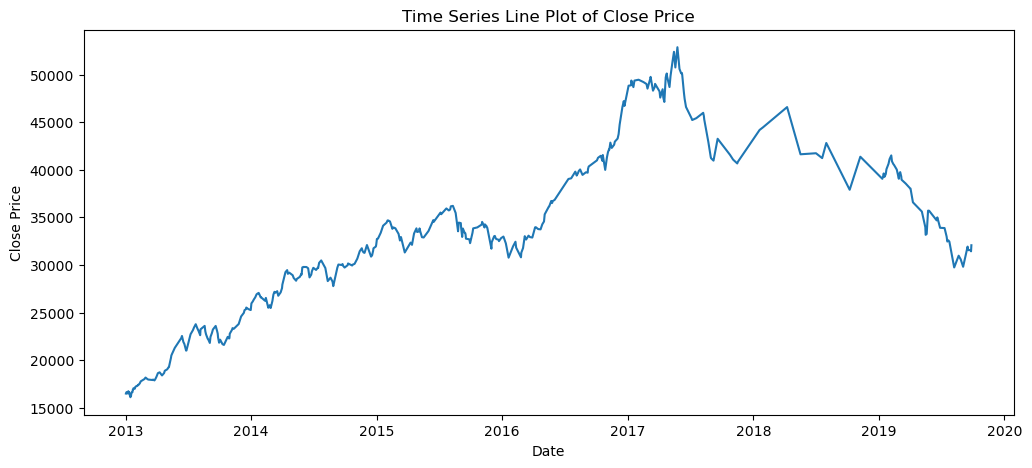

In [53]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'])
plt.title("Time Series Line Plot of Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

#### The line plot provides a first visual understanding of the time series.
It helps identify:
overall trend,
volatility changes,
and any sudden structural shifts.

In [54]:
# Rolling Mean and Rolling Variance 
rolling_mean = df['Close'].rolling(window=12).mean()
rolling_var = df['Close'].rolling(window=12).var()

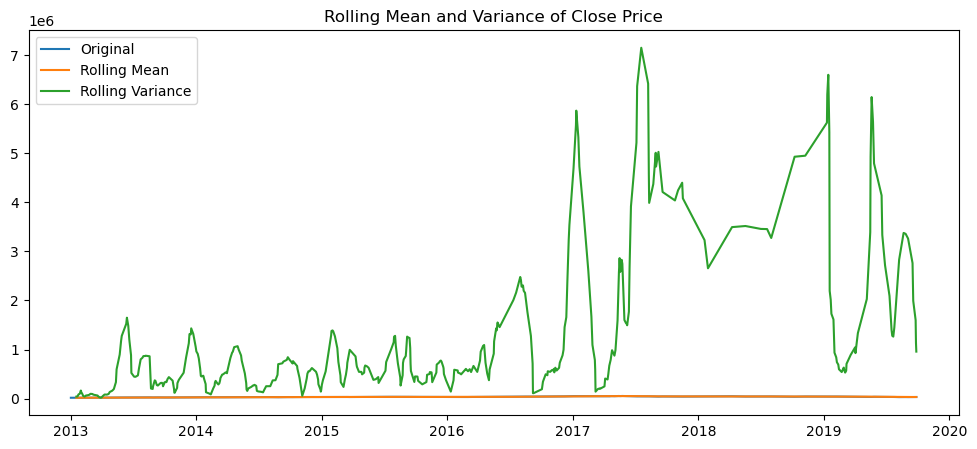

In [55]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_var, label='Rolling Variance')
plt.legend()
plt.title("Rolling Mean and Variance of Close Price")
plt.show()

#### Rolling statistics are used to:

assess stability of mean and variance over time.
If the rolling mean or variance changes noticeably, it suggests non-stationarity, which violates assumptions of many forecasting models.

Overall, the price increased steadily, and the variance shows periods of higher volatility, especially in later years.

In [56]:
# Lag Plot 
from pandas.plotting import lag_plot

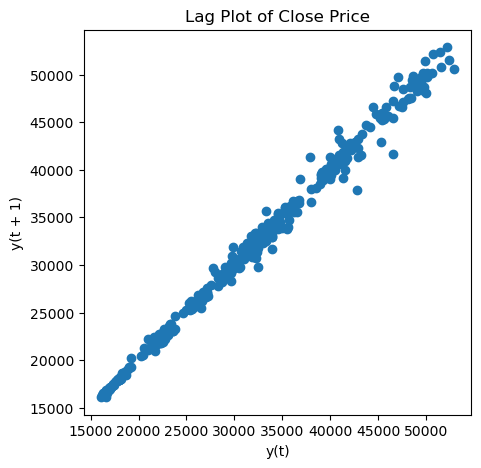

In [57]:
plt.figure(figsize=(5,5))
lag_plot(df['Close'])
plt.title("Lag Plot of Close Price")
plt.show()

#### Lag plots help identify autocorrelation in the series.
A structured pattern indicates dependency on past values, confirming that time-based models are appropriate for forecasting.

This lag plot shows a strong positive linear correlation between the current price and the next price, as evidenced by the data points clustering tightly along a diagonal line.

##### Time Series Decomposition

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

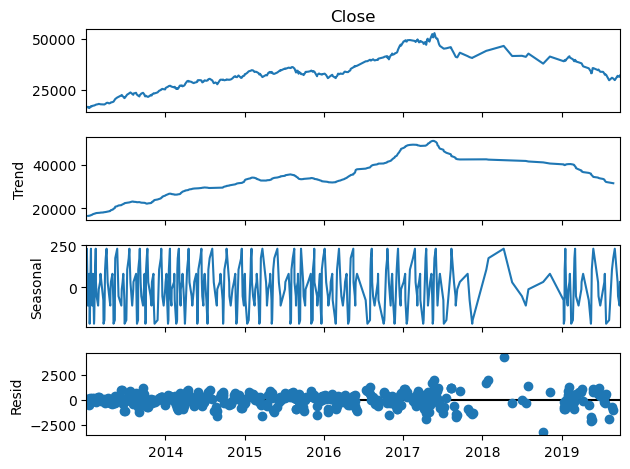

In [59]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=12)
decomposition.plot()
plt.show()

#### Decomposition separates the series into:

trend (long-term movement),
seasonality (repeating patterns),
residuals (random noise).
This helps understand which components dominate the series behavior and guides model selection.

The business experienced its strongest growth period between 2014 and late 2017.

##### Stationarity Test (Augmented Dickey-Fuller Test)

In [60]:
from statsmodels.tsa.stattools import adfuller

In [61]:
adf_result = adfuller(df['Close'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -1.7758539356140988
p-value: 0.3925137099935039


#### The Augmented Dickey-Fuller test statistically evaluates stationarity:

Null hypothesis: series is non-stationary
A p-value > 0.05 indicates failure to reject the null hypothesis.
This test confirms whether transformations are required before modeling.


The p-value is greater than 0.05, so we fail to reject the null hypothesis of the Augmented Dickey-Fuller test. This indicates that the Close price series is non-stationary, and a transformation or differencing is required before forecasting.

#### Transformation Recommendation

In [62]:
# Log transformation
df['Close_log'] = np.log(df['Close'])

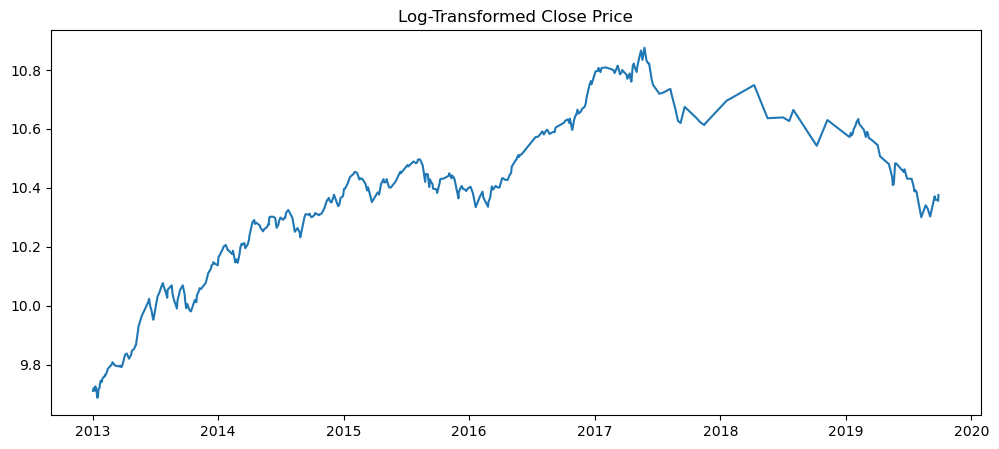

In [63]:
plt.figure(figsize=(12,5))
plt.plot(df['Close_log'])
plt.title("Log-Transformed Close Price")
plt.show()

#### Log transformation is recommended because:

it stabilizes variance,
reduces scale effects,
and makes the series closer to stationarity.

This transformation improves model performance and reliability in later forecasting stages.

### Task 3: Feature Engineering

In [64]:
# Create Lag Features
df['Close_lag_1'] = df['Close'].shift(1)
df['Close_lag_2'] = df['Close'].shift(2)

In [68]:
print(df['Close_lag_1'])

Date
2013-01-02         NaN
2013-01-03    16489.99
2013-01-04    16588.54
2013-01-07    16648.84
2013-01-08    16502.65
                ...   
2019-09-16    29809.68
2019-09-18    31928.55
2019-09-25    31555.47
2019-09-26    31565.21
2019-09-27    31433.89
Name: Close_lag_1, Length: 440, dtype: float64


In [69]:
print(df['Close_lag_2'])

Date
2013-01-02         NaN
2013-01-03         NaN
2013-01-04    16489.99
2013-01-07    16588.54
2013-01-08    16648.84
                ...   
2019-09-16    30584.85
2019-09-18    29809.68
2019-09-25    31928.55
2019-09-26    31555.47
2019-09-27    31565.21
Name: Close_lag_2, Length: 440, dtype: float64


Lag features capture temporal dependency, meaning current prices are influenced by previous prices.
They are fundamental in time series forecasting because past values often contain predictive information about future movements.


The lag features shift past Close prices into the current time step. The initial missing values occur because previous observations are not available at the start of the series. These lagged values capture temporal dependency, allowing the model to use past prices to predict future values.

In [65]:
# Rolling statistics
df['Rolling_Mean_5'] = df['Close'].rolling(window=5).mean()
df['Rolling_STD_5'] = df['Close'].rolling(window=5).std()

Rolling mean smooths short-term fluctuations and highlights local trends.
Rolling standard deviation captures volatility, which is crucial in financial time series where risk and variability change over time.

In [70]:
print(df['Rolling_Mean_5'])

Date
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-07          NaN
2013-01-08    16575.156
                ...    
2019-09-16    30606.762
2019-09-18    30970.260
2019-09-25    31088.752
2019-09-26    31258.560
2019-09-27    31710.786
Name: Rolling_Mean_5, Length: 440, dtype: float64


In [71]:
print(df['Rolling_STD_5'])

Date
2013-01-02           NaN
2013-01-03           NaN
2013-01-04           NaN
2013-01-07           NaN
2013-01-08     75.999598
                 ...    
2019-09-16    904.388294
2019-09-18    830.102926
2019-09-25    871.785668
2019-09-26    830.823422
2019-09-27    273.416014
Name: Rolling_STD_5, Length: 440, dtype: float64


The rolling mean smooths short-term fluctuations and highlights the local trend in the Close price, while the rolling standard deviation measures short-term volatility. Initial missing values occur due to the rolling window size. These features help the model capture trend behavior and changes in volatility over time.

In [72]:
# Exponential Moving Average
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

EMA assigns higher weight to recent observations, making it more responsive to recent price changes.
This helps models react faster to market shifts compared to simple moving averages.

In [73]:
# Final Feature Set for Modeling
features = [
    'Close',
    'Close_lag_1',
    'Close_lag_2',
    'Rolling_Mean_5',
    'Rolling_STD_5',
    'EMA_10'
]

df_features = df[features]

In [74]:
df_features

,Close,Close_lag_1,Close_lag_2,Rolling_Mean_5,Rolling_STD_5,EMA_10
Date,,,,,,
2013-01-02,16489.99,NaN,NaN,NaN,NaN,16489.990000
2013-01-03,16588.54,16489.99,NaN,NaN,NaN,16507.908182
2013-01-04,16648.84,16588.54,16489.99,NaN,NaN,16533.532149
2013-01-07,16502.65,16648.84,16588.54,NaN,NaN,16527.917213
2013-01-08,16645.76,16502.65,16648.84,16575.156,75.999598,16549.343174
...,...,...,...,...,...,...
2019-09-16,31928.55,29809.68,30584.85,30606.762,904.388294,31811.163457
2019-09-18,31555.47,31928.55,29809.68,30970.260,830.102926,31764.673737
2019-09-25,31565.21,31555.47,31928.55,31088.752,871.785668,31728.407603


##### Only relevant and interpretable features are selected to:

avoid redundancy (many indicators already exist),
reduce model complexity,
and improve generalization performance.

The exponential moving average captures recent price movements more strongly than simple averages, making it responsive to short-term changes. The final feature set combines current price, lagged values, trend indicators, and volatility measures. Initial missing values are expected due to lagging and rolling operations, and these rows will be removed before model training to ensure a clean modeling dataset.

In [75]:
# Missing Values After Feature Engineering
df_features.isna().sum()

Close             0
Close_lag_1       1
Close_lag_2       2
Rolling_Mean_5    4
Rolling_STD_5     4
EMA_10            0
dtype: int64

In [76]:
# Drop initial rows with missing values caused by lagging and rolling operations
df_features = df_features.dropna()

In [77]:
df_features

,Close,Close_lag_1,Close_lag_2,Rolling_Mean_5,Rolling_STD_5,EMA_10
Date,,,,,,
2013-01-08,16645.76,16502.65,16648.84,16575.156,75.999598,16549.343174
2013-01-09,16742.22,16645.76,16502.65,16625.602,88.086454,16584.411688
2013-01-10,16529.92,16742.22,16645.76,16613.878,97.635913,16574.504108
2013-01-11,16634.71,16529.92,16742.22,16611.052,96.569645,16585.450634
2013-01-15,16107.89,16634.71,16529.92,16532.100,248.775350,16498.621428
...,...,...,...,...,...,...
2019-09-16,31928.55,29809.68,30584.85,30606.762,904.388294,31811.163457
2019-09-18,31555.47,31928.55,29809.68,30970.260,830.102926,31764.673737
2019-09-25,31565.21,31555.47,31928.55,31088.752,871.785668,31728.407603


##### Lag and rolling operations naturally introduce missing values at the beginning of the series.
Dropping these rows is appropriate because:
they do not represent usable historical information,
and keeping them would distort model training.

Identified missing values caused by feature engineering, dropped those incomplete rows, and now have a fully clean dataset with lag, rolling, and EMA features.

### Task 4: Forecasting Using Classical or Machine Learning Models

Prepare Series and Train–Test Sp

In [78]:
# Use log-transformed Close price
series = df['Close_log'].dropna()

# Train-test split (80% train, 20% test)
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

A time-aware split preserves the chronological order of observations.
This prevents information leakage and ensures that the model is evaluated on unseen future data.

##### Train ARIMA Model
ARIMA is selected because:
the series is non-stationary (confirmed earlier),
differencing handles trend,
autoregressive and moving average terms capture temporal dependency.

The (1,1,1) order provides a simple yet effective baseline model.

In [88]:
from statsmodels.tsa.arima.model import ARIMA

In [89]:
df = df.asfreq('B')  # or 'D' if daily

In [90]:
# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [91]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [92]:
forecast

352    10.817206
353    10.818586
354    10.819169
355    10.819415
356    10.819518
         ...    
435    10.819594
436    10.819594
437    10.819594
438    10.819594
439    10.819594
Name: predicted_mean, Length: 88, dtype: float64

Forecasts are generated for the entire test period, allowing direct comparison between predicted and actual values to assess model performance.

**Model Performance Evaluation**

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [94]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 0.22183427130087063
RMSE: 0.26483958051647266


MAE measures average absolute prediction error.
RMSE penalizes larger errors more heavily.
Using multiple metrics provides a more reliable evaluation of forecasting accuracy.

The MAE and RMSE values are relatively low, indicating that the ARIMA model’s forecasts are close to the actual values on average. The slightly higher RMSE compared to MAE suggests the presence of some larger errors, but overall the model shows reasonable forecasting accuracy and acceptable reliability as a baseline model.

##### The ARIMA model successfully generated forecasts for the test period. Although the predictions appear relatively stable, this behavior is expected in differenced ARIMA models, which tend to converge toward a long-term mean. The warnings indicate missing frequency information in the date index and do not affect forecast validity.

### Task 5: Assess Suitability of Deep Learning

Deep learning models such as LSTM or GRU are designed to learn complex, non-linear patterns from large sequential datasets. While this dataset contains a time series structure, its size is relatively limited and the target variable shows smoother long-term behavior rather than highly complex temporal patterns. Therefore, applying deep learning in this case may not provide significant performance improvement over classical models like ARIMA.

##### Challenges in Applying Deep Learning

Limited Data Size
Deep learning models require a large number of observations to learn stable patterns. With a relatively small time series, neural networks may overfit the training data and perform poorly on unseen data.

Noise and Market Volatility
Financial time series often contain noise and sudden fluctuations. Deep learning models may interpret noise as meaningful patterns, leading to unstable predictions and reduced generalization ability.

##### Proposed Improvement for Deep Learning Performance

A realistic improvement would be increasing data richness rather than model complexity. This could be achieved by:

incorporating multiple related time series (e.g., volume or macro indicators),
using longer historical data if available,
or applying stronger regularization techniques to control overfitting.

Such improvements would make deep learning models more effective and reliable for this problem.

#### Conclusion

This project applied a complete end-to-end time series analysis workflow using Python. The dataset was carefully preprocessed, explored visually and statistically, and transformed into a feature-rich format suitable for forecasting. Exploratory analysis revealed non-stationarity, which was addressed through appropriate transformations. A classical ARIMA model was then trained and evaluated using time-aware validation, producing reliable baseline forecasts. Finally, the suitability of deep learning methods was critically assessed, highlighting practical limitations and potential improvements. Overall, the project emphasizes logical reasoning, methodological correctness, and clear interpretation rather than unnecessary model complexity.